In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd

In [2]:
# img_width, img_height = 512, 512

# train_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\train'
# validation_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\validate'
# test_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\test"

In [3]:
img_width, img_height = 512, 512

train_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\train"
validation_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\val'
test_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\test"

In [4]:
nb_train_samples = 204
nb_validation_samples = 40
num_of_test_samples = 16
epochs = 50
batch_size = 32

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

In [6]:
input_shape

(512, 512, 1)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
#model.summary()

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 0.1)

In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode ='grayscale')

Found 1944 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale')

Found 243 images belonging to 2 classes.


In [14]:
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

Found 16 images belonging to 2 classes.


In [15]:
STEP_SIZE_TRAIN = nb_train_samples // batch_size
STEP_SIZE_VALID = nb_validation_samples // batch_size
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 15s 3s/step - loss: 3.2636 - accuracy: 0.5000 - val_loss: 0.6672 - val_accuracy: 0.6875
Epoch 2/50
6/6 [==============================] - 15s 3s/step - loss: 0.6607 - accuracy: 0.6354 - val_loss: 0.6706 - val_accuracy: 0.6250
Epoch 3/50
6/6 [==============================] - 16s 3s/step - loss: 0.6549 - accuracy: 0.6510 - val_loss: 0.5632 - val_accuracy: 0.7812
Epoch 4/50
6/6 [==============================] - 16s 3s/step - loss: 0.6437 - accuracy: 0.6979 - val_loss: 0.6771 - val_accuracy: 0.6250
Epoch 5/50
6/6 [==============================] - 15s 2s/step - loss: 0.6760 - accuracy: 0.6562 - val_loss: 0.6223 - val_accuracy: 0.6875
Epoch 6/50
6/6 [==============================] - 15s 2s/step - loss: 0.6409 - accuracy: 0.6823 - val_loss: 0.6217 - val_accuracy: 0.6875
Epoch 7/50
6/6 [==============================] - 15s 3s/step - loss: 0.6166 - accuracy: 0.7031 

In [16]:
model.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5232064127922058, 0.6875]

In [17]:
STEP_SIZE_TEST = 1
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
1/1 [==============================] - 0s 997us/step


In [18]:
pred

array([[0.306283  ],
       [0.40655315],
       [0.18302512],
       [0.05182928],
       [0.39585316],
       [0.04220697],
       [0.03920349],
       [0.13769397],
       [0.02692971],
       [0.3121286 ],
       [0.33184642],
       [0.04709494],
       [0.03549072],
       [0.38171047],
       [0.3691078 ],
       [0.12865368]], dtype=float32)

In [19]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
labels = (train_generator.class_indices)
# labels.keys()
target = test_generator.classes

In [21]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]


In [23]:
# predictions

In [24]:
# filenames=test_generator.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)

Text(0.5, 0, 'Epoch')

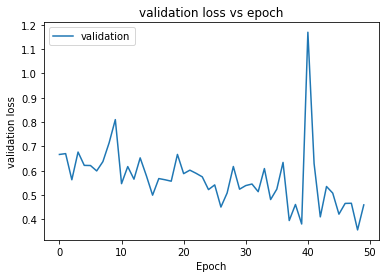

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

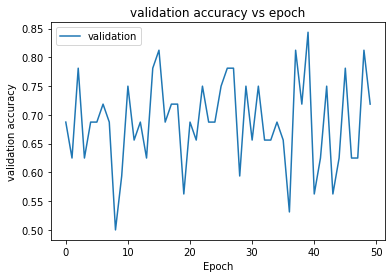

In [26]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

In [27]:
# validation_generator[1]

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
# len(validation_generator[1])
# len(predicted_class_indices)
print("Classification Report: \n", classification_report(target, predicted_class_indices))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# #Confusion Matrix and Classification Report
# Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = ['covid', 'normal']
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))